<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN

_Authors: Matt Brems, Riley Dallas, Jeff Hale_

## Learning Objectives
*After this lesson, you will be able to:*

- Implement DBSCAN clustering in scikit-learn.
- Identify advantages and disadvantages of DBSCAN.
- Describe the effect of `epsilon` and `min_samples` on DBSCAN.

### Prior knowledge required
- Python and pandas basics
- scikit-learn supervised machine learning basics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_wine
from sklearn.preprocessing import StandardScaler

### Review
How does k-means create clusters?

## DBSCAN 

Let's hop over to [this site](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/ ) to see how DBSCAN works. 

### Where `DBSCAN` shines
---

`DBSCAN` performs well when there is clear separation of groups within your dataset. 

#### Load the iris dataset into a pandas DataFrame. 

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

#### Check it out

In [3]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


### Preprocess with `StandardScaler`
---

Clustering algorithms are based on distance. We don't want the magnitude of the features to affect the results, so scale.

In [5]:
ss = StandardScaler()
X_scaled = ss.fit_transform(df)

## `DBSCAN`
---

Fit an instance of `DBSCAN` to `X_Scaled`. Use the default parameters for now (we'll tune them in a minute).

In [4]:
from sklearn.cluster import DBSCAN

In [6]:
# Leave everything default for now
dbscan = DBSCAN().fit(X_scaled)

## Model Evaluation: Silhouette score
---

Recall the formula for Silhouette score:

### $s_i = \frac{b_i - a_i}{max\{a_i, b_i\}}$

Where:
- $a_i$ = Cohesion: Mean distance of points within a cluster from each other.
- $b_i$ = Separation: Mean distance from point $x_i$ to all points in the next nearest cluster.

Use the `silhouette_score()` function from scikit-learn to evaluate the `DBSCAN` model clusters.

In [7]:
# Measures separateness of clusters 

from sklearn.metrics import silhouette_score

In [8]:
silhouette_score(X_scaled, dbscan.labels_)

0.35651648142700726

In [9]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

#### -1 means __no cluster__ ⚠️

Inertia does not exist. 
___

## EDA
---

View clusters using `seaborn`'s `pairplot` function. 

1. First, assign the clusters (`dbscan.labels_`) to your original DataFrame.
2. Then, create a `pairplot` using the `cluster` column as the hue.

In [10]:
df['label'] = dbscan.labels_

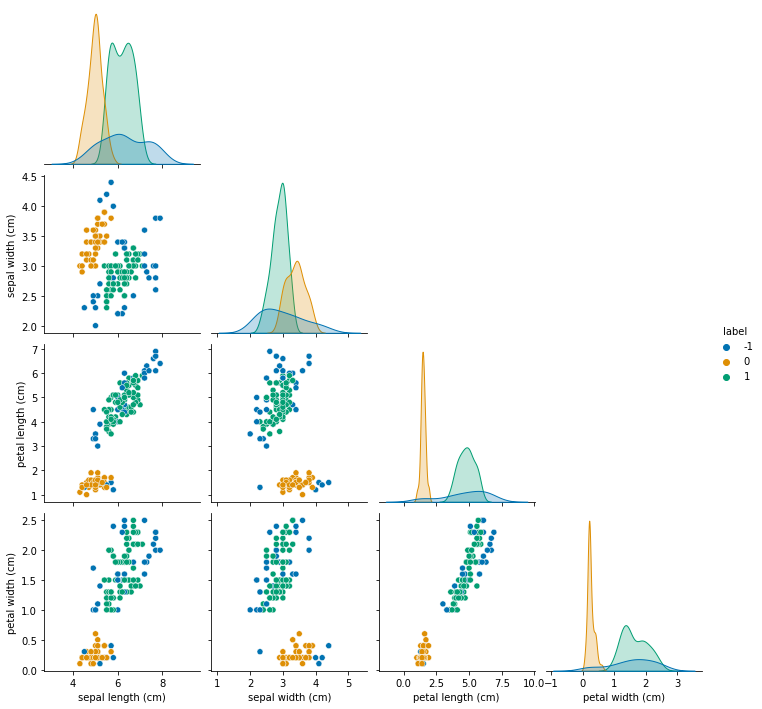

In [11]:
sns.pairplot(df, hue = 'label', corner = True, palette = 'colorblind') #corner just gives lower corner

In [ ]:
# -1 did not get put into a cluster 

## Let's try with a larger eps

In [12]:
dbscan2 = DBSCAN(eps=1.0).fit(X_scaled)

In [13]:
df['label'] = dbscan2.labels_

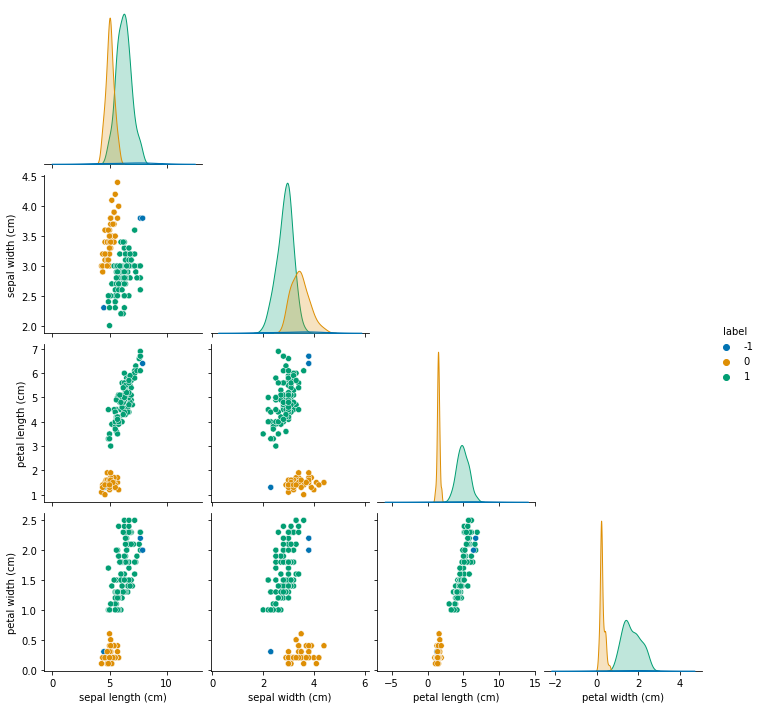

In [14]:
sns.pairplot(df, hue = 'label', corner = True, palette = 'colorblind') #looks better! 

## Where `DBSCAN` does poorly
---

Good `DBSCAN` performance requires two things:

1. Consistent density (one `eps` to rule them all)
2. Clear separation of the clusters within your dataset

The `load_wine` dataset is more or less clumped together, which makes it a great dataset for exposing one of the weaknesses of `DBSCAN`: no clear separation.

Load the wine dataset into a `pandas` DataFrame. Ignore the target.

In [ ]:
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [ ]:
wine_df.info()

In [ ]:
wine_df.head(2)

### Preprocessing: `StandardScaler`
---

Because clustering models are based on distance, we don't want the magnitude of our features to affect the algorithm. Therefore, when clustering **you should always scale your data**.

Create `X_scaled`.

### `DBSCAN`
---

Fit an instance of `DBSCAN` to `X_Scaled`. Use the following parameters:

- 2.3 for `eps`
- 4 for `min_samples`

#### How many clusters are created? -1 is the noise (no cluster)

## Model evaluation
---

Calculate the silhouette score for the `DBSCAN` cluster results.

## EDA
---

Ceate a `cluster` column using `dbscan.labels_`.

A `pairplot` would take a while. We'll groupby in a moment. 

#### Create a cluster column

#### Value counts for each cluster

## Explore each cluster
---

Clustering is sort of backwards: We fit a model, **then** we do EDA on each cluster. You can go one of two routes:

1. Break each cluster into its own DataFrame
2. Use `.groupby()` 

#### Use `.groupby()` with `.mean()` and see if you spot any defining characteristics

Use Seaborn to make a scatterplot that represents _flavanoids_, _total_phenols_, and _color_intensity_. Make each cluster a different color.

--- 
### Silhoute score search

"The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters." - The [docs](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

### Hyperparameter tune
Make a function with a loop to search for the optimum values for `eps` and `min_samples` for a DF you pass in. 

- Use `np.linspace` instead of `range` to search over decimal values for `eps`. Search over 50 values from .2 to 5.
- Search over `min_samples` up to half the number of rows in the DataFrame.
- Scale the data.
- Print all the goodies from the best model - including the number of clusters. 
- Note that you must have more than 1 label to compute the silhouette score.

In [ ]:
def find_best_silhouette(df): 
    """select best eps and min_samples for a DBSCAN
    Args:
        df (pandas DataFrame): data to cluster
    Returns:
        None
    """


#### Pass your function the wine_df

## How does K-means do?

Use K-means with the best number of clusters from DBSCAN.

---
# Exercise  🐧

Use the penguings dataset with DBSCAN to cluster penguins. Drop the _species_ column.

Which values for _eps_ and _minsamples_ are best?

Use the resulting number of clusters with K-means. 

Which algorithm performs better?

In [ ]:
pens = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')
pens.head(2)

--- 
## Summary

You've seen how to use the DBSCAN algorithm for clustering. 🚀

### Check for understanding

- Do you need to create a test set to judge performance with clustering?
- When might you want to use DBSCAN?
- Could you use cluster labels as a predictive features in a supervised learning task?
- What does `eps` control?